# Table of Content: <a class="anchor" id="table-of-content"></a>
* [1. Problem Background and Motivation](#problem-background)
* [2. Libraries and Custom Functions](#import-packages)
* [3. Data Exploration/Prep](#data-prep)
* [4. Machine Learning Model](#ml-model)
* [5. Deployment of Model](#model-deployment)

# 1. Problem Induction and Motivation <a class="anchor" id="problem-background"></a>

<img src='https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.freepik.com%2Fpremium-photo%2Floan-approval-financial-loan-application-form-lender-borrower-help-investment-bank-estate_4629823.htm&psig=AOvVaw0agf44IEvQ0dNe7niKY2qv&ust=1666241076457000&source=images&cd=vfe&ved=0CAwQjRxqFwoTCNjwrPG96_oCFQAAAAAdAAAAABAD' />

>- Define your mission!
>>-The mission for this jupyter notebook is to automate loan approval system.

>- Real World Impact! 
>>-Loan approval is a driving factor of nation's GDP, thus if this can be automated accurately the nation will thrive.

>- Key stakeholders!
>>-Bank Administrators

* [Go to Top](#table-of-content)

# 2. Libraries & Custom Functions <a class="anchor" id="import-packages"></a>
* [Go to Top](#table-of-content)

In [127]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
import numpy as np

# Graphics
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn import metrics


# Custom function below is used to display performance measures
# Required inputs are the model name and the two test data objects (X,y)
def class_perf_measures(model,X_test,y_test):
    # Create empty lists to store metric values created within loop
    TP = []
    TN = []
    FP = []
    FN = []
    recall = []
    precision = []
    F1 = []
    Accuracy = []
    
    # Create list of probability threshold values to loop over
    threshold = np.arange(0,1.1,0.1).tolist()

    # Start loop
    for i in threshold:

        # Create class assignments given threshold value
        y_test_pred_class = (model.predict_proba(X_test)[:,1] >= i).astype(int)

        # Append lists with metric values
        TP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,1])
        TN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,0])
        FP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,1])
        FN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,0])
        recall.append(metrics.recall_score(y_test, y_test_pred_class).round(3))
        precision.append(metrics.precision_score(y_test, y_test_pred_class).round(3))
        F1.append(metrics.f1_score(y_test, y_test_pred_class).round(2))
        Accuracy.append(metrics.accuracy_score(y_test, y_test_pred_class).round(2))

    # Create dataframe
    result = pd.DataFrame({"threshold":threshold,
                           "TP":TP,
                           "TN":TN,
                           "FP":FP,
                           "FN":FN,
                           "Precision":precision,
                           "Recall":recall,
                           "Accuracy": Accuracy,
                           "F1":F1,
                          })

    # Let's look at our dataframe
    return result

# 3. Data Exploration/Prep <a class="anchor" id="data-prep"></a>
* [Go to Top of Notebook](#table-of-content)

- [ ] [Initial Evaluation](#initial-evaluation)
- [ ] [Initial Cleanup - dupes, missing values](#missing-values)
- [ ] [Outlier Detection & Treatment](#outliers)
- [ ] [Feature Selection](#feature-selection)
- [ ] [Data Partitioning](#data-split)
- [ ] [Data Normalization](#normalization)

> **Initial Evaluation** <a class="anchor" id="initial-evaluation"></a>

In [120]:
# Read in data - see what we're dealing with
df = pd.read_csv('loan_approval.csv')
df.tail()

,approved,gender,age,debt,married,bank_customer,emp_industrial,emp_materials,emp_consumer_services,emp_healthcare,emp_financials,emp_utilities,emp_education,ethnicity_white,ethnicity_black,ethnicity_latino,ethnicity_asian,ethnicity_other,years_employed,prior_default,employed,credit_score,drivers_license,citizen_bybirth,citizen_other,citizen_temporary,Income
685,0,1,21.08,10.09,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1.25,0,0,0,0,1,0,0,0
686,0,0,22.67,0.75,1,1,1,0,0,0,0,0,0,1,0,0,0,0,2.00,0,1,2,1,1,0,0,394
687,0,0,25.25,13.50,0,0,0,0,0,1,0,0,0,0,0,1,0,0,2.00,0,1,1,1,1,0,0,1
688,0,1,17.92,0.20,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0.04,0,0,0,0,1,0,0,750
689,0,1,35.00,3.38,1,1,1,0,0,0,0,0,0,0,1,0,0,0,8.29,0,0,0,1,1,0,0,0


> **Initial Evaluation: Notes on Findings**<br><br>
>**Observations:**<br>
>>**Target:** Approved (1 if Approved, 0 otherwise)<br><br>

>[Go to Data Prep Outline](#data-prep)
---

> **Initial Cleanup - dupes, missing values** <a class="anchor" id="missing-values"></a>

In [121]:
df.drop(['ethnicity_white','ethnicity_black','ethnicity_latino','ethnicity_asian','ethnicity_other'], axis=1)

,approved,gender,age,debt,married,bank_customer,emp_industrial,emp_materials,emp_consumer_services,emp_healthcare,emp_financials,emp_utilities,emp_education,years_employed,prior_default,employed,credit_score,drivers_license,citizen_bybirth,citizen_other,citizen_temporary,Income
0,1,1,30.83,0.00,1,1,1,0,0,0,0,0,0,1.25,1,1,1,0,1,0,0,0
1,1,0,58.67,4.46,1,1,0,1,0,0,0,0,0,3.04,1,1,6,0,1,0,0,560
2,1,0,24.50,0.50,1,1,0,1,0,0,0,0,0,1.50,1,0,0,0,1,0,0,824
3,1,1,27.83,1.54,1,1,1,0,0,0,0,0,0,3.75,1,1,5,1,1,0,0,3
4,1,1,20.17,5.62,1,1,1,0,0,0,0,0,0,1.71,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0,1,21.08,10.09,0,0,0,0,0,0,0,0,1,1.25,0,0,0,0,1,0,0,0
686,0,0,22.67,0.75,1,1,1,0,0,0,0,0,0,2.00,0,1,2,1,1,0,0,394
687,0,0,25.25,13.50,0,0,0,0,0,1,0,0,0,2.00,0,1,1,1,1,0,0,1
688,0,1,17.92,0.20,1,1,0,0,1,0,0,0,0,0.04,0,0,0,0,1,0,0,750


> **Initial Cleanup: Summary of Actions**<br><br>
We are going to delete few columns to that I believe are harmful w.r.t to morals.

>[Go to Data Prep Outline](#data-prep)
---

> **Feature Selection** <a class="anchor" id="feature-selection"></a>
<br>

>**To Do:**<br>
> 1. Drop columns that are morally obligated.<br>


>[Go to Data Prep Outline](#data-prep)
---

> **Data Partitioning** <a class="anchor" id="data-split"></a>
<br>
>To Do:<br>
>1. Put all potential predictor variables into new object called 'X'
>2. Put target variable in new object called 'y'
>3. Partition data into training set and testing set<br>

>This is simple for now - may need to add more sampling complexity in future


> **About TARGET variable : "Approved"** <a class="anchor" id="data-split"></a>
<br>

>To Do:<br>
>1. Potential Predictor variables can be any variable that is attributing in predict variable 'approved' such as debt etc.  
>3. Partition data into training set and testing set<br>


> **Train/Test split** <a class="anchor" id="data-split"></a>
<br>

>To Do:<br>
>1. We need to determine the most accurate split ratio.
>2. Research random_state so that we can generate different accuracy scores.

>Result:<br>
>1. Since dataset is big enough we are going to go ahead with **60-40** split.
>2. After some thorough research, 1 convincing article(Check Appendix for link) and multiple hit and trial - the random state is **7** .



In [122]:
target = ['approved']

X = df.drop(target,axis=1)
y = df[target]

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.4,random_state=7)

>[Go to Data Prep Outline](#data-prep)
---

> **Data Normalization** <a class="anchor" id="normalization"></a>
<br><br>
>**Note:**<br>
>We do this AFTER splitting the data because we only want to use summary stats<br>
>from the TRAINING data to normalize BOTH TRAIN and TEST data<br>
<br><br>
>OPTIONAL - though it is a good idea to get in the habit of doing this when working with the kNN classifier

In [123]:
# Normalize predictor variables using Z-Scores.
# Use means and standard deviations of features as calculated in the TRAINING DATA
# New values are centered at 0.  Values reflect the number of standard deviations
# each record is above or below the mean.

features_means = X_train.mean()
features_std = X_train.std()

X_train = (X_train - features_means)/features_std
X_test = (X_test - features_means)/features_std

>[Go to Data Prep Outline](#data-prep)
---

# 4. Machine Learning <a class="anchor" id="ml-model"></a>

- [X] [kNN](#first-model)
- [X] [Logistic Model](#second-model)
- [ ] [Performance Evaluation](#third-model)


* [Go to Top](#table-of-content)

> **kNN** <a class="anchor" id="first-model"></a>
<br>
>Instructions:<br>
>1. Fit numerous kNN models using different values for k. <br>
>2. Choose the "best" value for "k" based on Accuracy

In [116]:
# 1. train a classifier for different values of k
results = []
for k in [1,3,5,7,9,11,13,15,17,19,21]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train.values.ravel())
    
    # Get predicted class
    y_pred_class = knn.predict(X_test)
    
    # Put Accuracy Score in results object
    results.append({'k':k,
                    'accuracy':metrics.accuracy_score(y_test,y_pred_class)
                   }
                  )
# Put results from above into a Pandas Dataframe
results_df = pd.DataFrame(results)
results_df

,k,accuracy
0,1,0.75
1,3,0.79
2,5,0.79
3,7,0.79
4,9,0.79
5,11,0.79
6,13,0.79
7,15,0.79
8,17,0.79
9,19,0.80


>**Thought process behind selecting "k" value:**<br>
Our main objective is to get the highest accuracy score and selecting lowest "k" value at the same time. We can select k = 3 or 11 but k=3 is too small, thus we select k = 11

>**Re-run kNN using the value selected above:**<br>
For this final run of kNN, we will produce a table of performance measures across a range of probability threshold values

In [117]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train.values.ravel())

# Let's do a quick check to see if we have to worry about problems of overfitting.
# Remember!  Small values for "k" in kNN tend to lead to overfitting.
# Large value for "k" in kNN tend to produce underfit models
y_train_pred_class = knn.predict(X_train)
y_test_pred_class = knn.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))


Training data Accuracy: 0.81
Testing data Accuracy: 0.79


>**Result for selecting k = 11:**<br>
By the result we can say confidently, we did not overfit or underfit the data since the accuracy for both is exactly same.

In [124]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train.values.ravel())

# Let's do a quick check to see if we have to worry about problems of overfitting.
# Remember!  Small values for "k" in kNN tend to lead to overfitting.
# Large value for "k" in kNN tend to produce underfit models
y_train_pred_class = lr_model.predict(X_train)
y_test_pred_class = lr_model.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))

Training data Accuracy: 0.88
Testing data Accuracy: 0.87


>**Now let's dive into performance measures:**
>First we will define all the TP, TN, FP and FN in business terms
> - **TP** : The loan should be approved and is also approved automatically.
> - **TN** : The loan should not have been approved and thus the model also disapproves the loan.
> - **FP** : The loan was supposed to be not approved but while being automated it was approved.  
> - **FN** : The work was supposed to be approved but while being automated it was not approved.


>**Business Objective:**
>> Our key stakeholder is Loan Approval department who aim to automate ACCURATE loan approval system based on lot of attributes. 

>> Over here the loan approval department wants us to focus on ACCURATE loan approval system. Thus the costliest mistake loan approval can make is to increase debters. 

>**Winning Model:**<br>
We need to quickly decide which modeling framework to go forward with<br>
To keep this simple - I'm going to use AUC and will choose the model that gives us the highest value

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


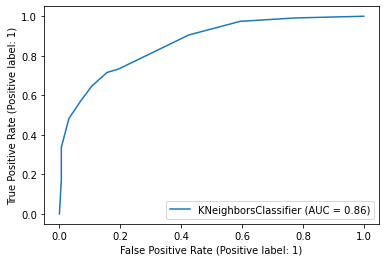

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


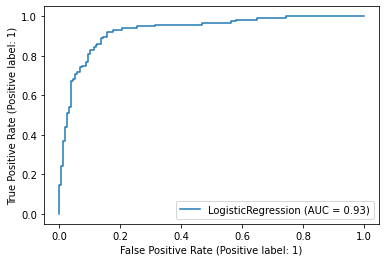

In [125]:
# ROC curve for kNN
metrics.plot_roc_curve(knn,X_test,y_test)
plt.show()

# ROC curve for Logistic Model
metrics.plot_roc_curve(lr_model,X_test,y_test)
plt.show()

>**Decision Point:**<br>
AUC is highest for our Logistic Model so I will use that model to further evaluate probability thresholds and corresponding performance measures

In [129]:
class_perf_measures(lr_model,X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,threshold,TP,TN,FP,FN,Precision,Recall,Accuracy,F1
0,0.00,116,0,160,0,0.42,1.00,0.42,0.59
1,0.10,111,109,51,5,0.69,0.96,0.80,0.80
2,0.20,109,127,33,7,0.77,0.94,0.86,0.84
3,0.30,107,133,27,9,0.80,0.92,0.87,0.86
4,0.40,104,135,25,12,0.81,0.90,0.87,0.85
5,0.50,100,139,21,16,0.83,0.86,0.87,0.84
6,0.60,98,142,18,18,0.84,0.84,0.87,0.84
7,0.70,86,148,12,30,0.88,0.74,0.85,0.80
8,0.80,80,152,8,36,0.91,0.69,0.84,0.78
9,0.90,53,156,4,63,0.93,0.46,0.76,0.61


1. **Prob Threshold = 0.4**:
    - relative high threshold required to predict positive outcomes.  This means we would expect a LOT of negative predictions.  In our case "positive" means "loan approved."  Sure enough, we DO see a lot of loan applicants being disapproved.
    - We also see a lot of True Negative (TN) - this makes sense given the low threshold
    - FPs - These are the category of loan applicants whom we need to minimize. 
    - FNs - These will definitely effect on profit but the costliest mistake is FPs because bank can suffer heavy losses and close.
    - We should increase our threshold because we are achieving same precision with high accuracy. 
  
<br><br>
2. **Prob Threshold = 0.6**:
    - We are achieving higher accuracy with same precision as threshold 0.4 thus we are leaning towards this probability threshold. 
    - Since threshold is increasing, it is also helping us determine true negatives more accurately, which is also needed by loan approval department.
<br><br>
3. **Prob Threshold = 0.8**:
    - This threshold is very high and thus definitely increases Precision but reduces accuracy because even some loan approved applicants are being rejected because of high cut off. 
    - Precision increased as expected but accuracy dropped which is worse.
    - It is definitely not better in terms of accuracy.

4. **Which threshold would you choose?  Justify your decision.**
    - I will choose threshold 0.6 because we are getting best of both worlds high accruacy and high precision

>[Go to Machine Learning Outline](#ml-model)
---

# 5. Deployment of Model <a class="anchor" id="model-deployment"></a>

Optional - Extra Credit for this assignment

* [Go to Top](#table-of-content)